# 读取数据集

读取tatanic数据集

In [62]:
import pandas as pd
data = pd.read_csv('train.csv', index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


# 探索性分析

按性别分组，探索性别对于生存的影响，从柱状图来看女性的生存率明显高于男性。上次模仿别人的代码，现在发现那个人的代码统计生存情况其实统计成了男性和女性的数量。

In [64]:
# 按照性别统计生还率
def count_survive(data):
    return data[data['Survived'] == 1].count()/data.count()

data_by_Sex = data.groupby(by=['Sex']).apply(count_survive)
data_by_Sex

C:\Users\86151\AppData\Local\Temp\ipykernel_21932\4141404007.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_by_Sex = data.groupby(by=['Sex']).apply(count_survive)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,0.742038,0.742038,0.742038,0.742038,0.754789,0.742038,0.742038,0.742038,0.742038,0.938144,0.740385
male,0.188908,0.188908,0.188908,0.188908,0.205298,0.188908,0.188908,0.188908,0.188908,0.420561,0.188908


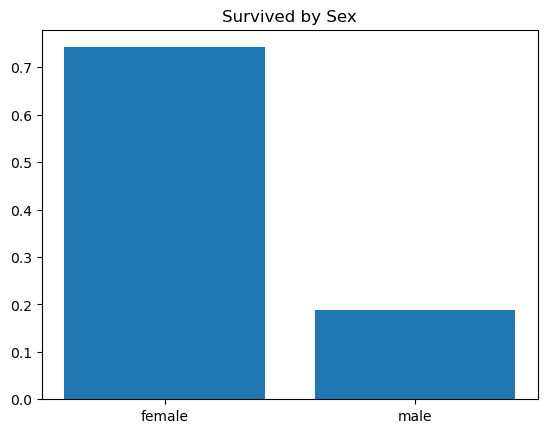

In [65]:
import matplotlib.pyplot as plt

plt.figure()
plt.title('Survived by Sex')
plt.bar(data_by_Sex.index, data_by_Sex['Survived'])
plt.show()

按阶级分组，探索阶级对于生存的影响。可以很明显看出阶级越高，生存率越高。

In [66]:
# 按阶级统计生存率
data_by_Pclass = data.groupby(by=['Pclass']).apply(count_survive)
data_by_Pclass

C:\Users\86151\AppData\Local\Temp\ipykernel_21932\2256813569.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_by_Pclass = data.groupby(by=['Pclass']).apply(count_survive)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,0.629630,0.629630,0.629630,0.629630,0.655914,0.629630,0.629630,0.629630,0.629630,0.664773,0.626168
2,0.472826,0.472826,0.472826,0.472826,0.479769,0.472826,0.472826,0.472826,0.472826,0.812500,0.472826
3,0.242363,0.242363,0.242363,0.242363,0.239437,0.242363,0.242363,0.242363,0.242363,0.500000,0.242363


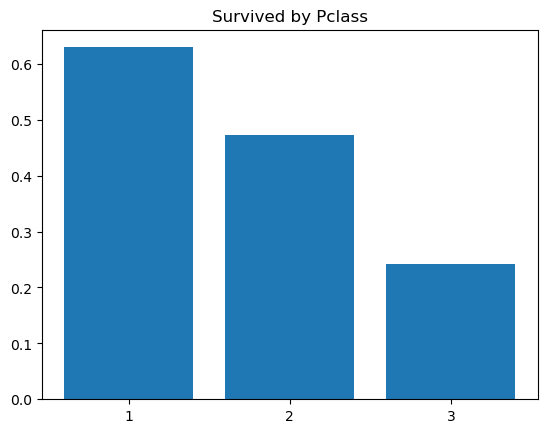

In [67]:
import matplotlib.pyplot as plt

plt.figure()
plt.title('Survived by Pclass')
plt.bar(['1', '2', '3'], data_by_Pclass['Survived'])
plt.show()

# 数据预处理

## 缺失值处理

了解一下缺失值的情况。

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


船舱数据缺失太多了，虽然我觉得床仓的位置对生存的影响应该比较大，但是没有合适的方法进行填补，只能删掉了。

Name和Ticket对与生存应该影响不大，也不太进行编码，因此也需要删除。

In [69]:
# 处理缺失值,删除缺失值较多的列
data = data.drop(columns=['Cabin'])

# 删除不必要的列
data = data.drop(columns=['Name', 'Ticket'])

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


Embarked不太好处理，选择直接删掉空行。

In [70]:
# 删除Embarked缺失的行
data = data.dropna(subset=['Embarked'])

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


Age用中位数填充是比较常见的方法，这里想用随机森林来进行缺失值的填补。但是变量没有编码可能会影响效果，所以先选择变量编码。

## 变量编码

查看一下变量的情况。

In [71]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


用sklearn模块对Sex，Embarked进行编码。

In [72]:
# 对Sex, Embarked进行编码
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data_ = data.copy()
data_ = encoder.fit_transform(data_)
data_ = pd.DataFrame(data_, columns=data.columns, index=data.index)
data_.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0.0,2.0,1.0,28.0,1.0,0.0,18.0,2.0
2,1.0,0.0,0.0,51.0,1.0,0.0,207.0,0.0
3,1.0,2.0,0.0,34.0,0.0,0.0,41.0,2.0
4,1.0,0.0,0.0,47.0,1.0,0.0,189.0,2.0
5,0.0,2.0,1.0,47.0,0.0,0.0,43.0,2.0


In [73]:
# 编码没有问题，应用到原数据
data = data_

## 随机森林填补缺失值

将Age作为y，其余特征与标签作为X，训练模型填补缺失值。

In [74]:
# 按Age是否缺失进行拆分
data_age_null = data[data['Age'].isnull()]
data_age_not_null = data.dropna(subset=['Age'])

In [75]:
# Age作为预测值，其他作为特征
X_train = data_age_not_null.drop(columns=['Age'])
y_train = data_age_not_null['Age']

X_test = data_age_null.drop(columns=['Age'])
y_test = data_age_null['Age']

In [76]:
# 使用随机森林训练模型
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.7272807721000756

In [77]:
# 预测Age
y_pred = model.predict(X_test)
y_pred

array([41.18204257, 47.48500401, 19.64      , 46.51553463, 25.45      ,
       35.32612818, 40.86366667, 25.165     , 26.34204762, 44.47786935,
       41.10361938, 43.97954762, 25.165     , 28.2305    , 45.78666667,
       52.38980556, 19.375     , 35.32612818, 41.10361938, 25.14      ,
       41.10361938, 41.10361938, 35.32612818, 34.13437485, 30.44625   ,
       41.10361938, 60.41063095, 18.56833333, 33.162     , 39.95069444,
       32.91821187, 13.48767857, 31.6425    , 66.7311645 ,  7.75216667,
       18.6950119 , 35.7       , 56.26      , 29.915     , 60.41063095,
       25.165     , 13.48767857, 49.55994048, 35.32612818, 10.34833333,
       40.66666667, 23.5325    , 29.915     , 39.95069444, 37.9005    ,
       60.41063095, 34.667     , 68.46333333, 25.165     , 45.31490553,
       73.85449784, 52.38980556, 55.52695238, 25.165     , 31.05166667,
       40.17      , 41.10361938, 39.5575    , 13.48767857, 28.78783333,
       42.09866667, 35.32612818, 41.81      , 69.45      , 46.51

In [78]:
# 填充data中Age的缺失值
data.loc[data['Age'].isnull(), 'Age'] = y_pred
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    float64
 1   Pclass    889 non-null    float64
 2   Sex       889 non-null    float64
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    float64
 5   Parch     889 non-null    float64
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(8)
memory usage: 62.5 KB


从这一步可以看到数据已经没有缺失值了，接下来就可以正式开始训练模型了。

# 模型训练

## 随机森林

In [79]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['Survived'])
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [80]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9887482419127989

In [81]:
model.score(X_test, y_test)

0.8370786516853933

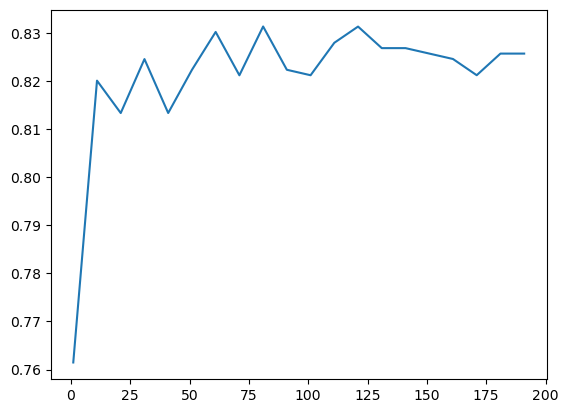

In [82]:
# 调节n_estimators
from sklearn.model_selection import cross_val_score
import numpy as np
scores = []
for n in range(1, 200, 10):
    model = RandomForestClassifier(n_estimators=n)
    score = cross_val_score(model, X, y, cv=5)
    scores.append(np.mean(score))
    
plt.figure()
plt.plot(range(1, 200, 10), scores)
plt.show()

In [83]:
range(1, 200, 10)[scores.index(max(scores))]

81

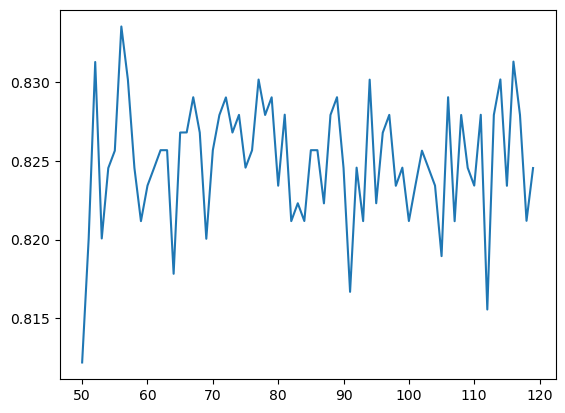

In [84]:
# 50-120精调
scores = []
for n in range(50, 120):
    model = RandomForestClassifier(n_estimators=n)
    score = cross_val_score(model, X, y, cv=5)
    scores.append(np.mean(score))
    
plt.figure()
plt.plot(range(50, 120), scores)
plt.show()

In [85]:
range(50, 120)[scores.index(max(scores))]

56

In [91]:
# 交叉验证测试一下
model = RandomForestClassifier(n_estimators=56)
model.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5).mean()

0.818923379673713

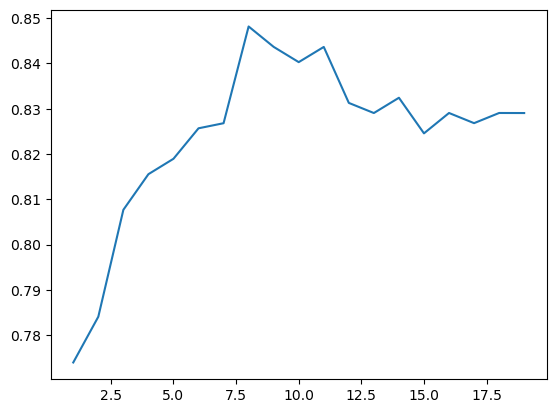

In [92]:
# 优化max_depth
scores = []
for n in range(1, 20):
    model = RandomForestClassifier(n_estimators=100, max_depth=n)
    score = cross_val_score(model, X, y, cv=5)
    scores.append(np.mean(score))

plt.figure()
plt.plot(range(1, 20), scores)
plt.show()

In [93]:
range(1, 20)[scores.index(max(scores))]

8

In [94]:
# 交叉验证测试一下
model = RandomForestClassifier(n_estimators=100, max_depth=8)
model.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5).mean()

0.8357963562496031

In [95]:
# 优化min_samples_split, min_samples_leaf, max_features
from sklearn.model_selection import GridSearchCV

param_grid = {
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 10),
    'max_features': range(1, 10)
}

model = RandomForestClassifier(n_estimators=100, max_depth=8)
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=8),
             param_grid={'max_features': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10)})